C:\Users\user\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


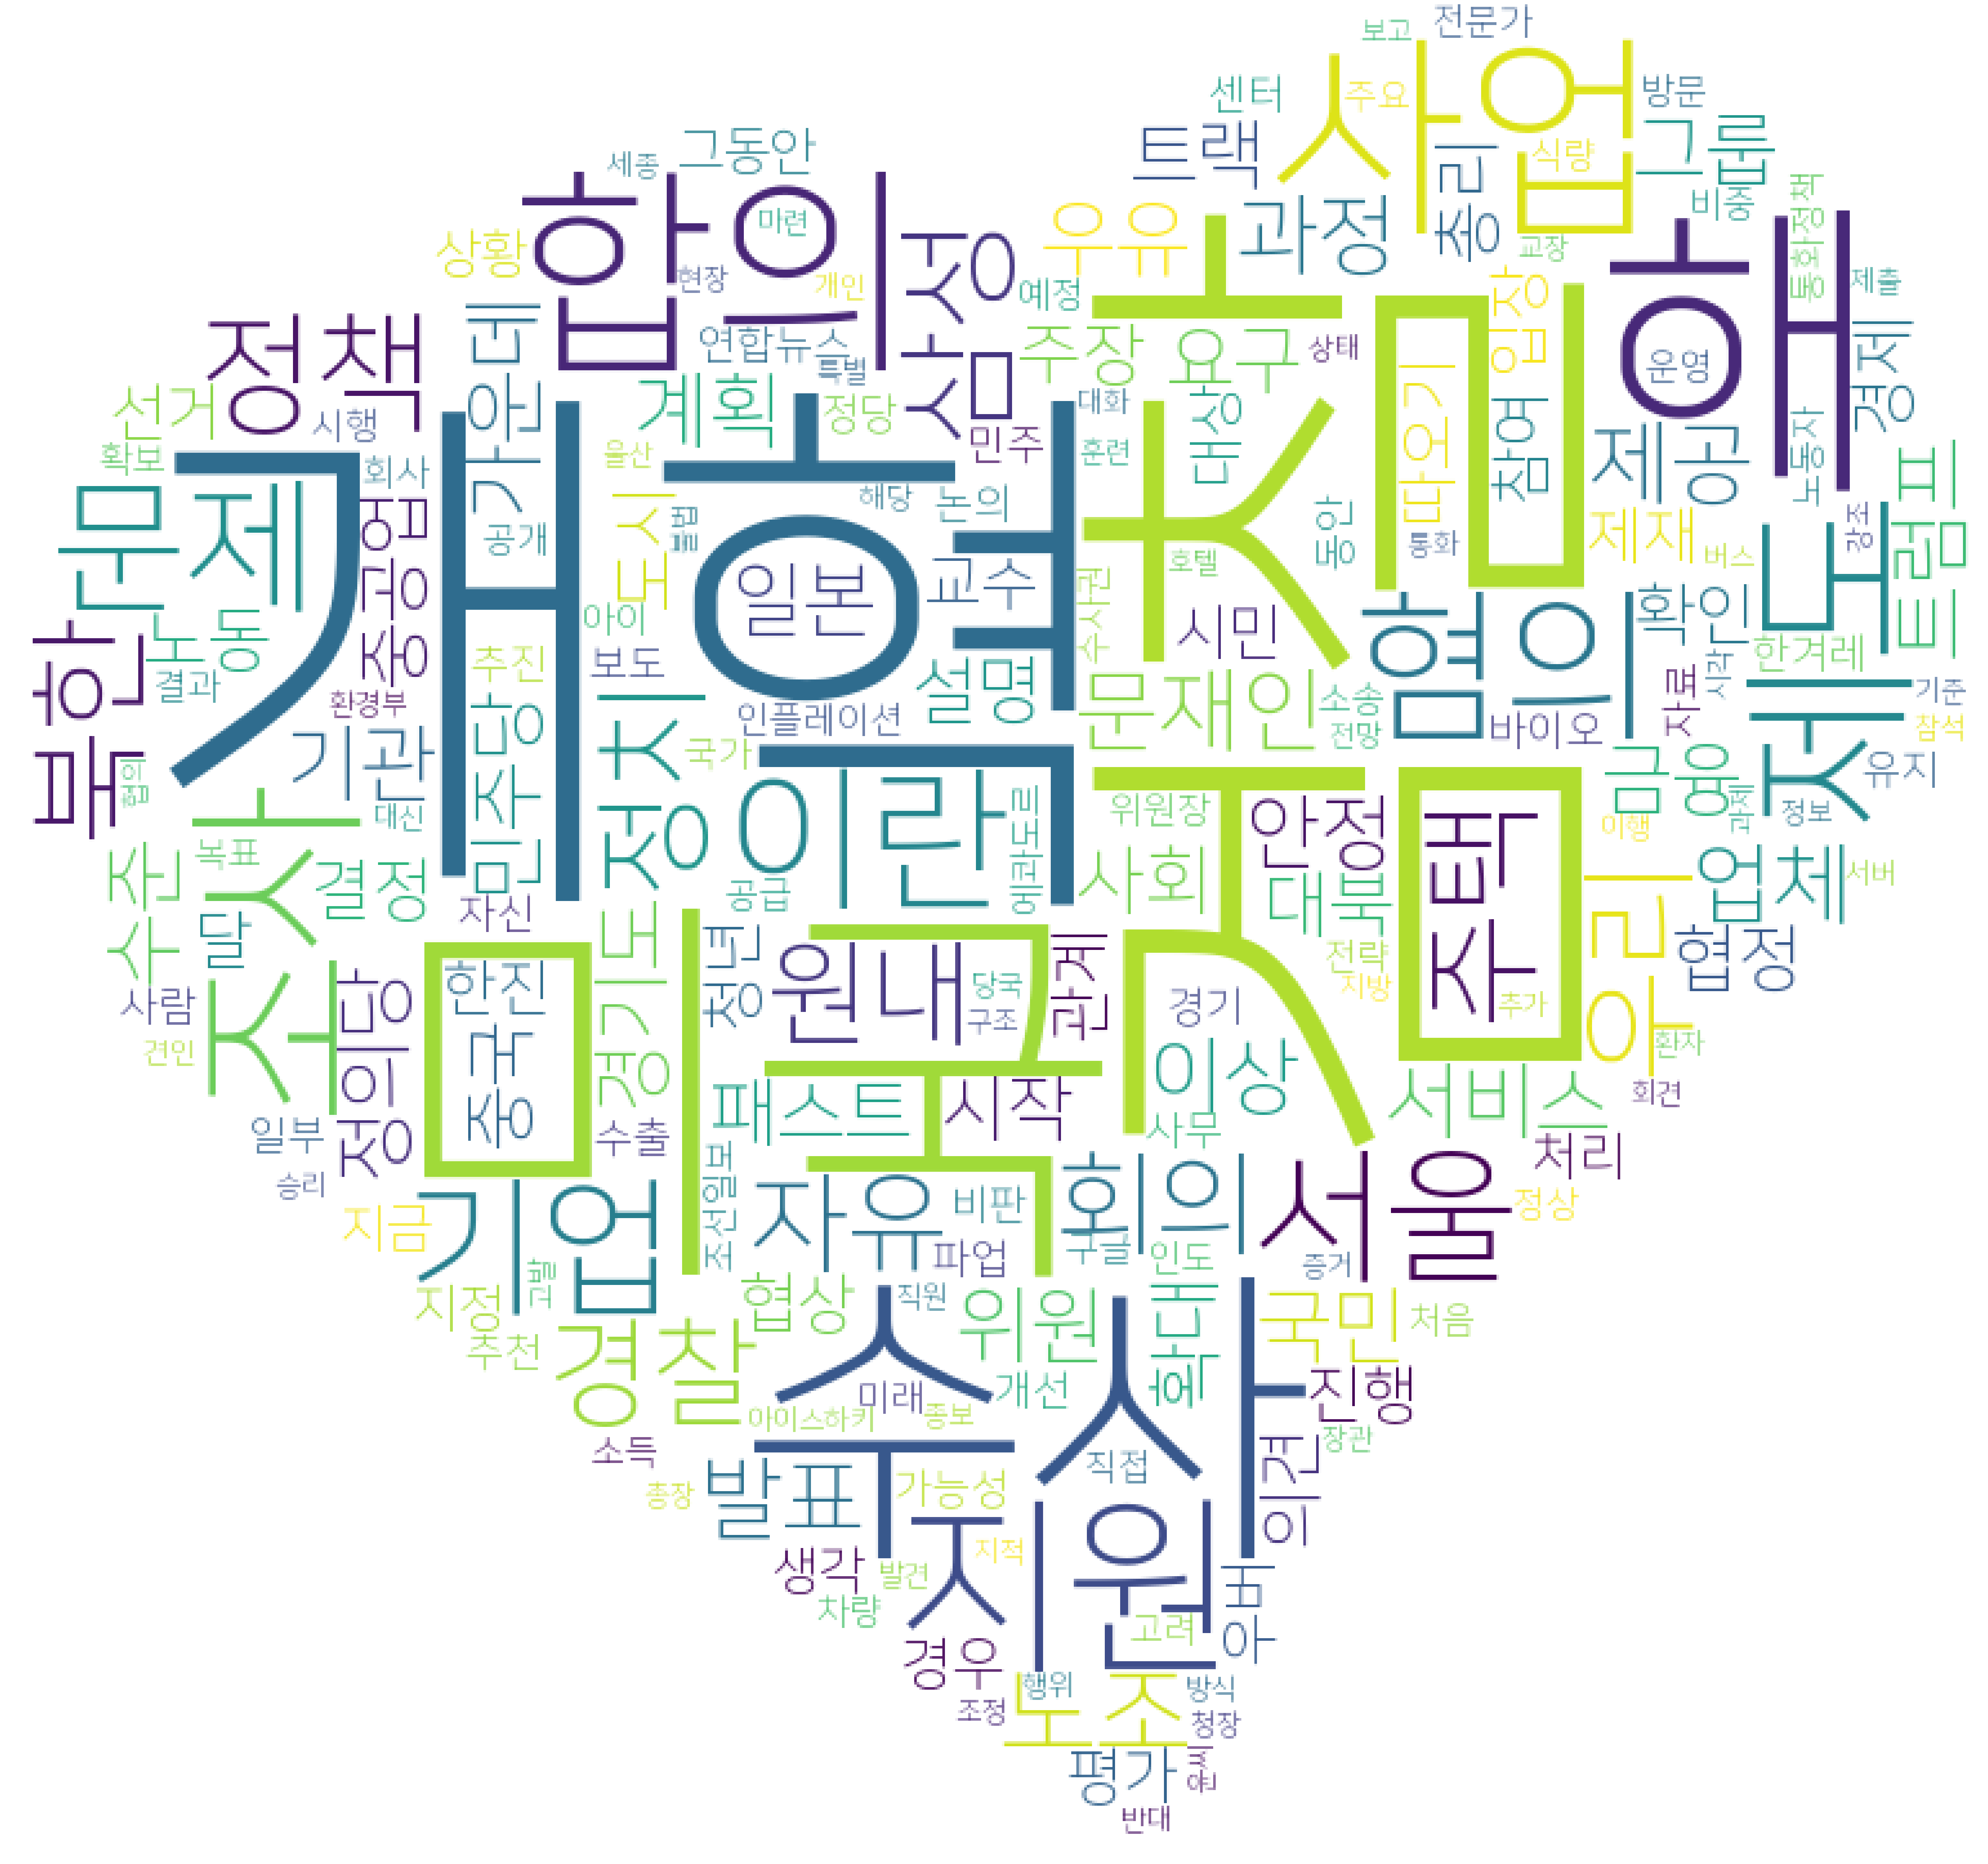

In [2]:
%matplotlib inline
import feedparser
from konlpy.tag import Mecab
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from konlpy.tag import Twitter
import matplotlib.pyplot as plt

from PIL import Image
import numpy as np

from scipy.misc import imread
import imageio

import requests
from bs4 import BeautifulSoup
import re
from selenium import webdriver
import time
import xlrd
from selenium.common.exceptions import NoSuchElementException,StaleElementReferenceException
import os
from urllib.parse import quote_plus,  unquote_plus



h = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.131 Safari/537.36",
     "Referer":"http://www.chosun.com/"
    }


browser = webdriver.Chrome("./chromedriver.exe")

#조선일보

url = 'http://news.chosun.com/ranking/list.html'
browser.get(url)
html = browser.page_source
soup = BeautifulSoup(html, 'html.parser')

selector="dt > a"
list = soup.select(selector)

article_url = []
for idx, tag in enumerate(list):
    article_url.append(unquote_plus(tag.get("href")))
    
article_content=[]
news_text=''
for i in article_url:
    response1 = requests.get(i, headers = h)
    s1 = response1.content
    #s1 = s1.decode('utf-8')
    soup1 = BeautifulSoup(s1, "html.parser")
    
    k1=soup1.find_all('div',{'class':'par'})
    for idx, art in enumerate(k1):
        #print(art.text)
        article_content.append(art.text)
        news_text+=art.text
        
# 동아일보
url = 'http://www.donga.com/'

h = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.131 Safari/537.36",
     "Referer":"http://www.donga.com/"
    }

browser = webdriver.Chrome("./chromedriver.exe")

browser.get(url)
html = browser.page_source
soup = BeautifulSoup(html, 'html.parser')

selector="#content_in > div.mNewsLi > span > a"
list = soup.select(selector)

article_url = []
for idx, tag in enumerate(list):
    article_url.append(unquote_plus(tag.get("href")))
    
article_content=[]
for i in article_url:
    response1 = requests.get(i, headers = h)
    s1 = response1.content
    #s1 = s1.decode('utf-8')
    soup1 = BeautifulSoup(s1, "html.parser")
    
    k1=soup1.find_all('div',{'class':'article_txt'})
    for idx, art in enumerate(k1):
        #print(art.text)
        article_content.append(art.text)
        news_text+=art.text

#한겨례
url = 'http://www.hani.co.kr/'

h = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.131 Safari/537.36",
     "Referer":"http://www.hani.co.kr/"
    }

browser = webdriver.Chrome("./chromedriver.exe")

browser.get(url)
html = browser.page_source
soup = BeautifulSoup(html, 'html.parser')

selector="#main-top01-scroll-in > div.article01 > div > h4 > a"
list = soup.select(selector)

article_url = []
for idx, tag in enumerate(list):
    article_url.append("http://www.hani.co.kr/" + unquote_plus(tag.get("href")))
    
    
article_content=[]

for i in article_url:
    response1 = requests.get(i, headers = h)
    s1 = response1.content
    #s1 = s1.decode('utf-8')
    soup1 = BeautifulSoup(s1, "html.parser")
    
    k1=soup1.find_all('div',{'class':'text'})
    for idx, art in enumerate(k1):
        #print(art.text)
        article_content.append(art.text)
        news_text+=art.text

browser.close()
twitter = Twitter()
 
sentences_tag = []
#형태소 분석하여 리스트에 넣기
for sentence in article_content:
        morph = twitter.pos(sentence)
        sentences_tag.append(morph)

noun_adj_list = []
#명사와 형용사만 구분하여 이스트에 넣기
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if tag in ['Noun'] and len(word)>1:
            word = word.replace("진짜", "")
            word = word.replace("이씨", "")
            word = word.replace("지난", "")
            word = word.replace("사용", "")
            word = word.replace("대해", "")
            word = word.replace("이후", "")
            word = word.replace("대한", "")
            word = word.replace("최근", "")
            word = word.replace("라며", "")
            word = word.replace("모두", "")
            word = word.replace("모든", "")
            word = word.replace("오전", "")
            word = word.replace("내용", "")
            word = word.replace("하루", "")
            word = word.replace("위해", "")
            word = word.replace("사실", "")
            word = word.replace("오후", "")
            word = word.replace("이번", "")
            word = word.replace("최대", "")
            word = word.replace("가장", "")
            word = word.replace("다른", "")
            word = word.replace("오후", "")
            word = word.replace("통해", "")
            word = word.replace("각각", "")
            word = word.replace("포함", "")
            word = word.replace("오후", "")
            word = word.replace("오후", "")
            word = word.replace("오후", "")
            word = word.replace("오후", "")
            word = word.replace("오후", "")
            word = word.replace("당시", "")
            word = word.replace("때문", "")
            word = word.replace("제대로", "")
            word = word.replace("크게", "")
            word = word.replace("전혀", "")
            word = word.replace("하나", "")
            word = word.replace("관련", "")
            word = word.replace("앞서", "")
            word = word.replace("대통령", "")
            word = word.replace("대표", "")
            word = word.replace("의원", "")
            word = word.replace("기자", "")
            word = word.replace("한국", "")
            word = word.replace("국회", "")
            word = word.replace("위원회", "")
            word = word.replace("사건", "")
            word = word.replace("사고", "")
            word = word.replace("관계자", "")
            word = word.replace("회장", "")
            word = word.replace("지역", "")
            word = word.replace("정부", "")
            word = word.replace("차관", "")

            noun_adj_list.append(word)
 
#형태소별 count
word_count=1000
counts = Counter(noun_adj_list)
tags = counts.most_common(word_count)

 
#wordCloud생성
#한글꺠지는 문제 해결하기위해 font_path 지정
twitter_mask = np.array(Image.open('09. heart.jpg'))
wordcloud = WordCloud(font_path='NanumSquareL.ttf', background_color='white', width=800, height=600,
                     mask=twitter_mask)
#print(dict(tags))
cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(150, 120))
plt.axis('off')
plt.imshow(cloud)
plt.show()